In [1]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [2]:
print(torch.cuda.is_available())

True


In [3]:
print(torch.cuda.device_count())

1


In [4]:
#print(torch.cuda.get_device_name())

In [5]:
picture_path = "sm_lecture.png"
image = cv2.imread(picture_path, 0)
print(image.shape, type(image))

(808, 1167) <class 'numpy.ndarray'>


In [6]:
image_tensor = torch.tensor(image)

In [7]:
type(image_tensor)

torch.Tensor

In [8]:
# Same in numpy
"""gaussian_add = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1] ]).astype(np.float32)
print(type(gaussian_add))
gaussian_add = torch.tensor(gaussian_add)
print(type(gaussian_add))
                            """


gaussian_add = torch.tensor([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1] ]).float()

# Adding gaussian blur

In [9]:
gaussian_div = torch.div(gaussian_add, 16)

In [10]:
gaussian_div.shape

torch.Size([3, 3])

# Adding padding

In [11]:
image_tensor_ch_b = image_tensor.expand(1,1,-1,-1)

In [12]:
image_tensor_ch_b.shape

torch.Size([1, 1, 808, 1167])

# Adding padding

In [13]:
gaussian_div_och_inch = gaussian_div.expand(1,1,-1,-1)

In [14]:
gaussian_div_och_inch.shape

torch.Size([1, 1, 3, 3])

# Changing from uint to float

In [15]:
image_tensor_ch_b_float = image_tensor_ch_b.float()

# torch.nn.functional.conv2d takes in array of four dimensions. We changed it when we added the padding

In [16]:
gaussian_layers = torch.nn.functional.conv2d(image_tensor_ch_b_float, gaussian_div_och_inch, padding=1)

In [17]:
gaussian_layers.shape

torch.Size([1, 1, 808, 1167])

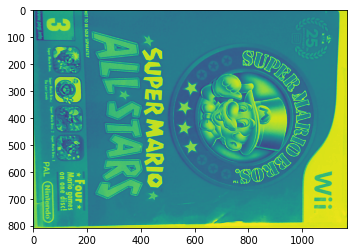

In [18]:
plt.imshow(image_tensor)

# For the gaussian layer we need to remove the padding again, making it to a two dimensional array again

In [19]:
squeezed_gaussian_layer= torch.squeeze(gaussian_layers)

In [20]:
torch.mean(squeezed_gaussian_layer)

tensor(135.8047)

In [21]:
torch.mean(image_tensor.float())

tensor(136.0037)

# The first two layers vanished

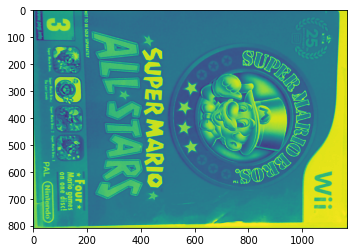

In [22]:
plt.imshow(squeezed_gaussian_layer)

# Raising to the power in pytorch

In [23]:
gaussian_div

tensor([[0.0625, 0.1250, 0.0625],
        [0.1250, 0.2500, 0.1250],
        [0.0625, 0.1250, 0.0625]])

In [24]:
power2_div = torch.pow(gaussian_div,2)

In [25]:
power2_div

tensor([[0.0039, 0.0156, 0.0039],
        [0.0156, 0.0625, 0.0156],
        [0.0039, 0.0156, 0.0039]])

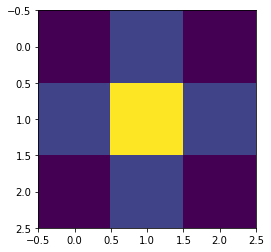

In [26]:
plt.imshow(power2_div)

In [27]:
example_kernel = torch.tensor([[1, 2, 3],
                            [0, 1, 0],
                            [-1, -2, -3]]).float()

In [28]:
power2_example = torch.pow(example_kernel, 2)
power2_example

tensor([[1., 4., 9.],
        [0., 1., 0.],
        [1., 4., 9.]])

# Squareroot in pytorch

In [29]:
square_example = torch.sqrt(power2_example)

In [30]:
square_example

tensor([[1., 2., 3.],
        [0., 1., 0.],
        [1., 2., 3.]])

# Thinking about efficency

In [31]:
images_together = image_tensor + image_tensor

In [32]:
images_together.shape

torch.Size([808, 1167])

In [33]:
torch.mean(images_together.float())

tensor(171.9195)

In [34]:
start_time = time.time()
for _ in range(1000):
    images_added = 0
    images_added = torch.add(image_tensor, image_tensor)
print(f"The calculation took {time.time() - start_time} seconds")

The calculation took 0.20410609245300293 seconds


In [35]:
start_time = time.time()
for _ in range(1000):
    images_added = 0
    images_added = image_tensor + image_tensor
print(f"The calculation took {time.time() - start_time} seconds")

The calculation took 0.17278289794921875 seconds


# Tresholding

In [36]:
threshold = torch.nn.Threshold(1,0)

In [37]:
torch_threshold = threshold(example_kernel)

In [38]:
torch_threshold

tensor([[0., 2., 3.],
        [0., 0., 0.],
        [0., 0., 0.]])